## Import important Libaries

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from timeit import default_timer as timer
from tqdm.auto import tqdm
from helper_functions import *

In [2]:
transform = torchvision.transforms.Compose([torchvision.transforms.Grayscale(),
                                            torchvision.transforms.ToTensor()])

## Get data ready

In [3]:
training_data = datasets.CIFAR10(root= "data", 
                                train=True, # get training data
                                download=True, # download data if it doesn't exist on disk
                                transform=transform, # images come as PIL format, we want to turn into Torch tensors
                                target_transform=None) # you can transform labels as well)

testing_data = datasets.CIFAR10(root= "data", 
                                train=False, # get training data
                                download=True, # download data if it doesn't exist on disk
                                transform=transform, # images come as PIL format, we want to turn into Torch tensors
                                target_transform=None) # you can transform labels as well)



Files already downloaded and verified
Files already downloaded and verified


In [4]:
image, label = training_data[100]
image,label
image.shape, training_data.classes

(torch.Size([1, 32, 32]),
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

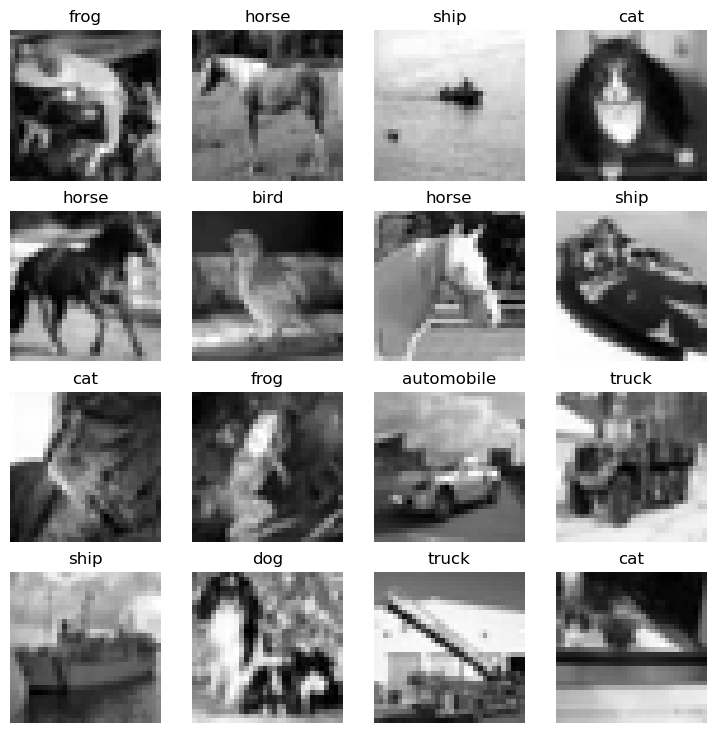

In [5]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(training_data), size=[1]).item()
    img, label = training_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(training_data.classes[label])
    plt.axis(False);

In [6]:
BATCH_SIZE = 32

train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002B98DF5C970>, <torch.utils.data.dataloader.DataLoader object at 0x000002B98DF5C9D0>)
Length of train dataloader: 1563 batches of 32
Length of test dataloader: 313 batches of 32


In [7]:
training_images_batch, training_labels_batch = next(iter(train_dataloader))
print(training_labels_batch)
print(training_images_batch.shape)

tensor([4, 0, 5, 5, 5, 1, 8, 7, 1, 4, 5, 9, 5, 1, 7, 4, 1, 4, 0, 6, 1, 5, 3, 1,
        5, 5, 7, 7, 8, 4, 8, 0])
torch.Size([32, 1, 32, 32])


Image size: torch.Size([1, 32, 32])
Label: 8, label size: torch.Size([])


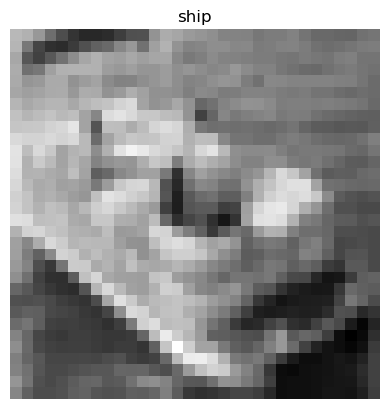

In [8]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(training_images_batch), size=[1]).item()
img, label = training_images_batch[random_idx], training_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(training_data.classes[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [9]:
from models import mnist10_modelv0
torch.manual_seed(42)

model_1 = mnist10_modelv0(
    input_shape= training_images_batch.shape[2] * training_images_batch.shape[3],
    output_shape= len(training_data.classes)
)

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.2)

# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [11]:
# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 20

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch+1}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device = device
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device = device
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)



  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1
---------
Train loss: 2.11552 | Train accuracy: 21.61%
Test loss: 2.10321 | Test accuracy: 24.19%

Epoch: 2
---------
Train loss: 1.96779 | Train accuracy: 28.66%
Test loss: 2.09956 | Test accuracy: 26.43%

Epoch: 3
---------
Train loss: 1.89460 | Train accuracy: 32.08%
Test loss: 2.00835 | Test accuracy: 28.36%

Epoch: 4
---------
Train loss: 1.84701 | Train accuracy: 33.87%
Test loss: 1.91740 | Test accuracy: 30.53%

Epoch: 5
---------
Train loss: 1.80739 | Train accuracy: 35.15%
Test loss: 1.91586 | Test accuracy: 31.88%

Epoch: 6
---------
Train loss: 1.77551 | Train accuracy: 36.38%
Test loss: 1.79666 | Test accuracy: 35.59%

Epoch: 7
---------
Train loss: 1.74606 | Train accuracy: 37.67%
Test loss: 1.83306 | Test accuracy: 34.32%

Epoch: 8
---------
Train loss: 1.71887 | Train accuracy: 38.49%
Test loss: 1.83570 | Test accuracy: 33.46%

Epoch: 9
---------
Train loss: 1.69439 | Train accuracy: 39.43%
Test loss: 1.76064 | Test accuracy: 37.77%

Epoch: 10
---------
Train lo

In [12]:
X,y = next(iter(test_dataloader))
print(y,X[0].shape)
y_pred = model_1(X.to(device)).argmax(dim=1)
print(y_pred)

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5]) torch.Size([1, 32, 32])
tensor([6, 9, 1, 8, 6, 2, 1, 3, 5, 9, 3, 9, 7, 7, 9, 8, 7, 0, 0, 7, 4, 0, 2, 9,
        0, 8, 4, 9, 9, 6, 6, 4], device='cuda:0')


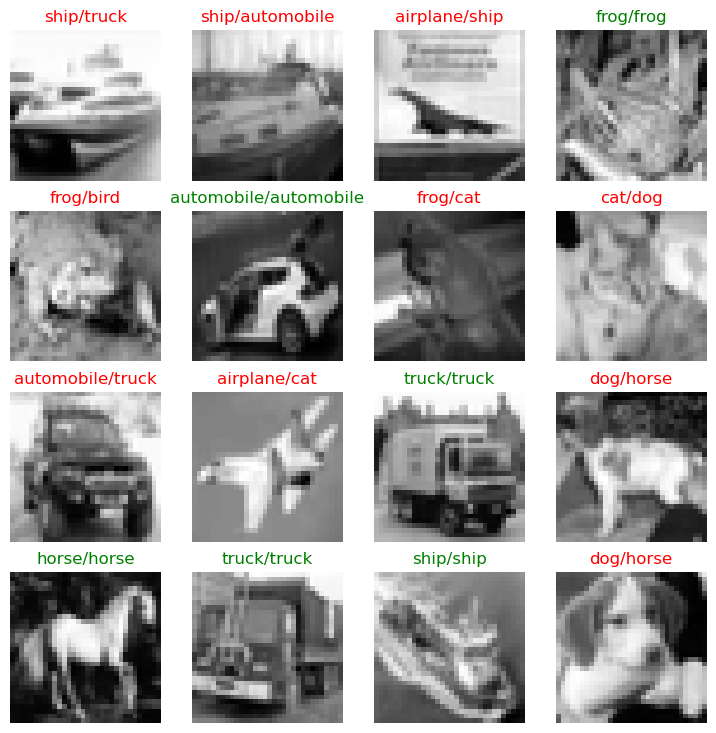

In [13]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    plt.imshow(X[i].squeeze(), cmap="gray")
    if training_data.classes[y[i]] != training_data.classes[y_pred[i]]:

        plt.title(f"{training_data.classes[y[i]]}/{training_data.classes[y_pred[i]]}", color="red")
    else:
        plt.title(f"{training_data.classes[y[i]]}/{training_data.classes[y_pred[i]]}", color = "green")

    plt.axis(False);

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

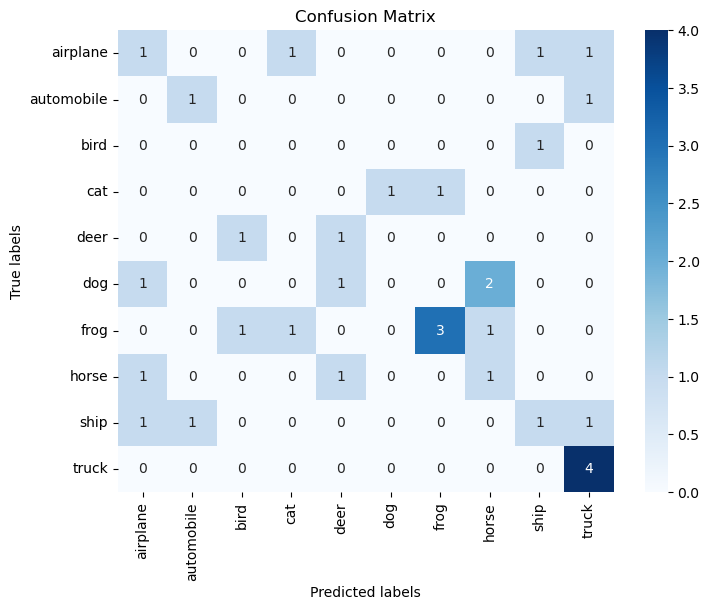

In [15]:
# Compute confusion matrix
y_pred = y_pred.to('cpu')
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=training_data.classes, 
            yticklabels=training_data.classes)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()